In [54]:
import math
import warnings
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from matplotlib.pyplot import style
from scipy.stats import boxcox
import statsmodels.api as sm
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
plt.style.use('ggplot')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [55]:
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
data.drop(index=127, inplace=True)
display(data.head())

In [60]:
data['sqrtnewspaper'] = np.sqrt(data.Newspaper)
data['logradiotv'] = np.log(data.Radio/data.TV)
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,sqrtnewspaper,logradiotv
0,1,230.100,37.800,69.200,22.100,8.319,-1.806
1,2,44.500,39.300,45.100,10.400,6.716,-0.124
2,3,17.200,45.900,69.300,9.300,8.325,0.982
3,4,151.500,41.300,58.500,18.500,7.649,-1.300
4,5,180.800,10.800,58.400,12.900,7.642,-2.818


In [63]:
Y = data['Sales'].values.reshape(-1,1)
X = data[['sqrtnewspaper', 'logradiotv']]
regr.fit(X, Y)

print('\nCoefficients:', regr.coef_)
print('Intercept:', regr.intercept_)
print('R squared:', regr.score(X,Y))


Coefficients: [[ 0.58136686 -0.68782641]]
Intercept: [9.76552615]
R squared: 0.07473407788168995


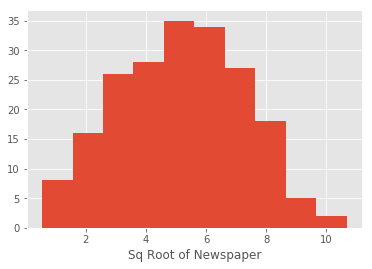

In [69]:
#Normalize newspaper data.
plt.hist(np.sqrt(data.Newspaper))
plt.xlabel('Sq Root of Newspaper')
plt.show()

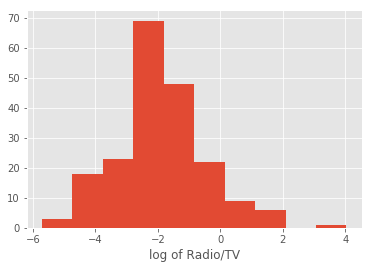

In [70]:
#Normalize Tv and Radio by adding log interaction between the 2.
plt.hist(np.log(data.Radio/data.TV))
plt.xlabel('log of Radio/TV')
plt.show()

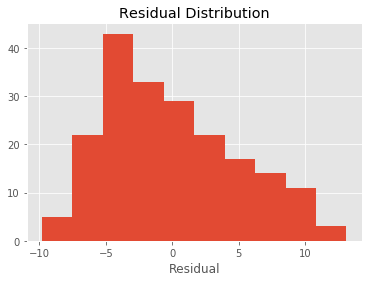

In [72]:
predicted = regr.predict(X).ravel()
actual = data['Sales']
residual = actual - predicted

plt.hist(residual)
plt.xlabel('Residual')
plt.title('Residual Distribution')
plt.show()

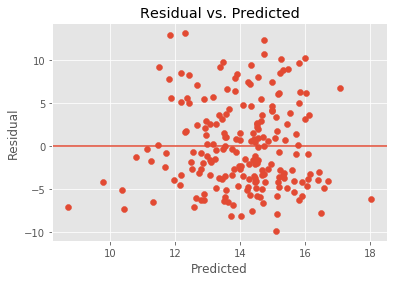

In [66]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()